In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import string

import nltk
from nltk.corpus import stopwords

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from sklearn.metrics.pairwise import cosine_similarity

In [2]:
data = pd.read_csv(r"C:\Users\Dell\Downloads\naukri-job-recommendation\job_data.csv")
data.head()

,Uniq Id,Crawl Timestamp,Job Title,Job Salary,Job Experience Required,Key Skills,Role Category,Location,Functional Area,Industry,Role
0,9be62c49a0b7ebe982a4af1edaa7bc5f,2019-07-05 01:46:07 +0000,Digital Media Planner,Not Disclosed by Recruiter,5 - 10 yrs,Media Planning| Digital Media,Advertising,Mumbai,"Marketing , Advertising , MR , PR , Media Plan...","Advertising, PR, MR, Event Management",Media Planning Executive/Manager
1,3c52d436e39f596b22519da2612f6a56,2019-07-06 08:04:50 +0000,Online Bidding Executive,Not Disclosed by Recruiter,2 - 5 yrs,pre sales| closing| software knowledge| clien...,Retail Sales,"Pune,Pune","Sales , Retail , Business Development","IT-Software, Software Services",Sales Executive/Officer
2,ffad8a2396c60be2bf6d0e2ff47c58d4,2019-08-05 15:50:44 +0000,Trainee Research/ Research Executive- Hi- Tec...,Not Disclosed by Recruiter,0 - 1 yrs,Computer science| Fabrication| Quality check|...,R&D,Gurgaon,"Engineering Design , R&D","Recruitment, Staffing",R&D Executive
3,7b921f51b5c2fb862b4a5f7a54c37f75,2019-08-05 15:31:56 +0000,Technical Support,"2,00,000 - 4,00,000 PA.",0 - 5 yrs,Technical Support,Admin/Maintenance/Security/Datawarehousing,Mumbai,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Technical Support Engineer
4,2d8b7d44e138a54d5dc841163138de50,2019-07-05 02:48:29 +0000,Software Test Engineer -hyderabad,Not Disclosed by Recruiter,2 - 5 yrs,manual testing| test engineering| test cases|...,Programming & Design,Hyderabad,IT Software - QA & Testing,"IT-Software, Software Services",Testing Engineer


In [3]:
data['Key Skills']= data['Key Skills'].str.replace("|", "," )
data['Key Skills']

<ipython-input-3-1c4cd2303dae>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  data['Key Skills']= data['Key Skills'].str.replace("|", "," )


0                            Media Planning, Digital Media
1         pre sales, closing, software knowledge, clien...
2         Computer science, Fabrication, Quality check,...
3                                        Technical Support
4         manual testing, test engineering, test cases,...
                               ...                        
29995     Graphics, C++, USB, Project management, SOC, ...
29996     Service delivery, LMS, CRE, Integration servi...
29997        Counselor, Mentor, Trainer, Advisor, Teaching
29998     Security Analysis, Software Development Life ...
29999     Press release, Public relations, Publishing, ...
Name: Key Skills, Length: 30000, dtype: object

In [4]:
data = data.drop(['Uniq Id','Crawl Timestamp'], axis=1)

In [5]:
data.isnull().sum()

Job Title                   575
Job Salary                   50
Job Experience Required     573
Key Skills                 1271
Role Category              2305
Location                    577
Functional Area             573
Industry                    573
Role                        901
dtype: int64

In [6]:
data = data.dropna()
data.shape

(27005, 9)

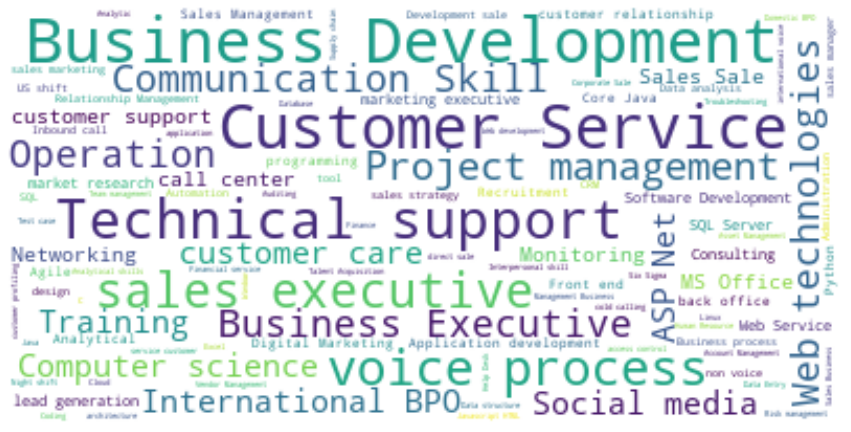

In [7]:
text = " ".join(i for i in data['Key Skills'])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords = stopwords, background_color ='white').generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

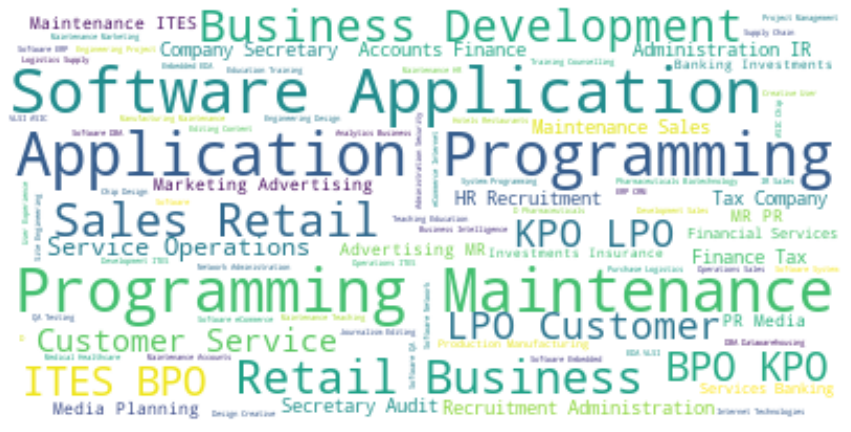

In [8]:
text = " ".join(i for i in data['Functional Area'])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords = stopwords, background_color ='white').generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

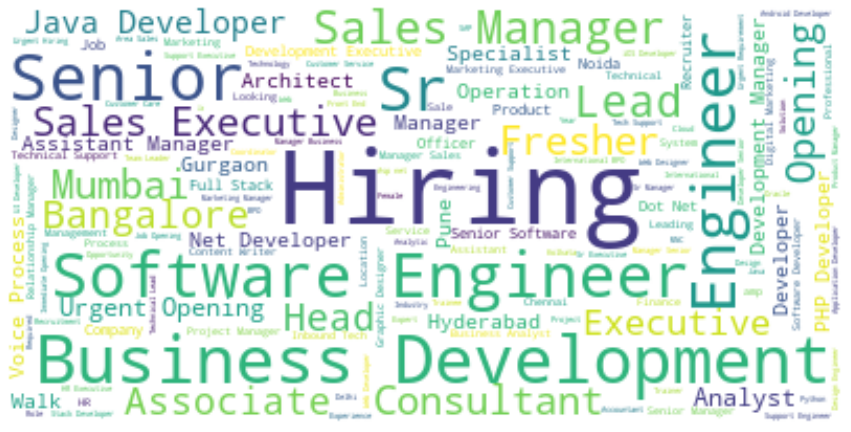

In [9]:
text = " ".join(i for i in data['Job Title'])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords = stopwords, background_color ='white').generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Content Based Recommendation System
- We use the 'Key Skills' to recommend jobs.
- Cosine similarity algorithm is used to create a similarity matrix from the 'Key Skills' column

In [10]:
from sklearn.feature_extraction import text

feature = data['Key Skills'].tolist()
tfidf = text.TfidfVectorizer(input=feature, stop_words="english")
tfidf_matrix = tfidf.fit_transform(feature)
similarity = cosine_similarity(tfidf_matrix)

In [11]:
#Setting job title as the index so that users can find similar jobs according to the jobs they are looking for
indices = pd.Series(data.index, index=data['Job Title']).drop_duplicates()

In [12]:
#Function to recommend jobs

def jobs_recommendation(Title, similarity = similarity):
    index = indices[Title]
    similarity_scores = list(enumerate(similarity[index]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[::], reverse = True)
    similarity_scores = similarity_scores[0:5]
    newindices = [i[0] for i in similarity_scores]
    return data[['Job Title', 'Job Experience Required', 
                 'Key Skills', 'Location']].iloc[newindices]

In [13]:
print(jobs_recommendation("Software Engineer"))

                                           Job Title Job Experience Required  \
2   Trainee Research/ Research Executive- Hi- Tec...               0 - 1 yrs   
1                           Online Bidding Executive               2 - 5 yrs   
0                              Digital Media Planner              5 - 10 yrs   

                                          Key Skills   Location  
2   Computer science, Fabrication, Quality check,...    Gurgaon  
1   pre sales, closing, software knowledge, clien...  Pune,Pune  
0                      Media Planning, Digital Media     Mumbai  
